In [1111]:
import warnings
import logging

warnings.filterwarnings("ignore")
logging.getLogger().setLevel(logging.ERROR)

In [1112]:
!pip install dtreeviz

In [1113]:
import graphviz.backend as be

In [1114]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
from sklearn.model_selection import train_test_split

In [1115]:
iris = load_iris()

In [1116]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

In [1117]:
clf = tree.DecisionTreeClassifier()

In [1118]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0.0, 39.0, 38.0]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.21\nsamples = 42\nvalue = [0, 5, 37]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [

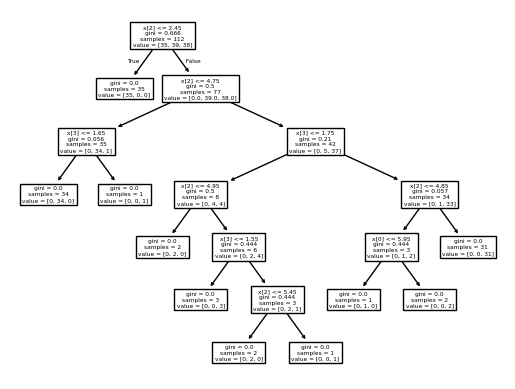

In [1119]:
from sklearn.tree import plot_tree
plot_tree(clf)

### 1. Classification

In [1120]:
from dtreeviz import model

In [1121]:
viz = model(clf,
            X_train,
            y_train,
            feature_names=iris.feature_names,
            class_names=['setosa', 'versicolor', 'virginica'],
            target_name="species")


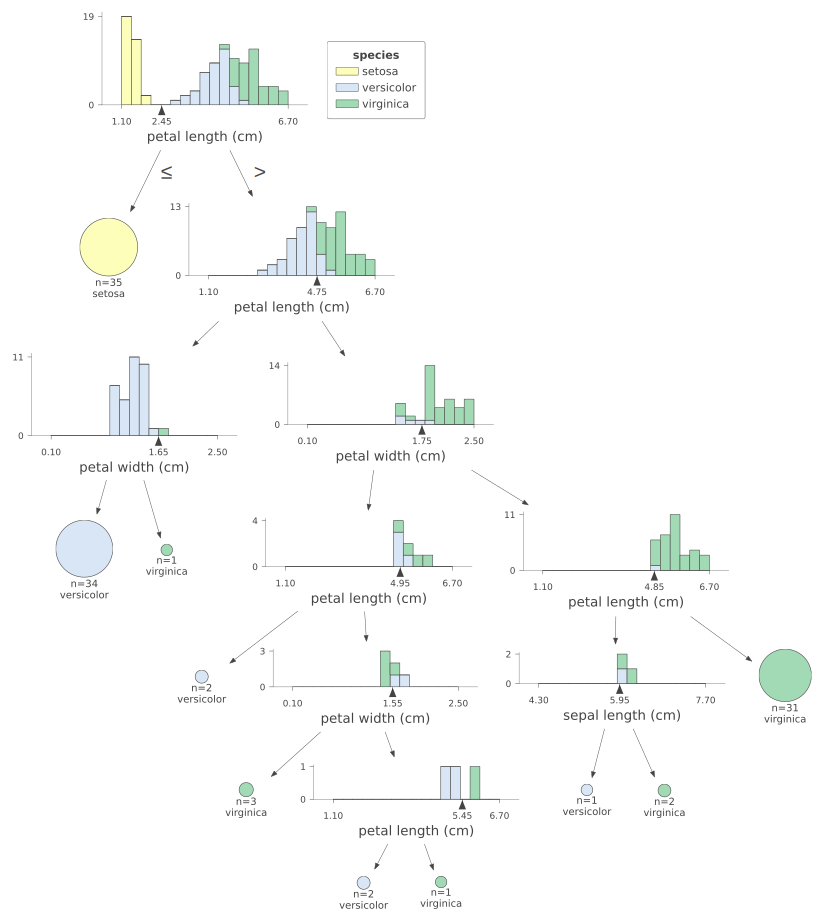

In [1122]:
viz.view(scale=1.5)

In [1123]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Horizontal Decision Tree (DT)

In [1124]:
viz = model(clf,
            X_train,
            y_train,
            feature_names=iris.feature_names,
            class_names=['setosa', 'versicolor', 'virginica'],
            target_name="species")


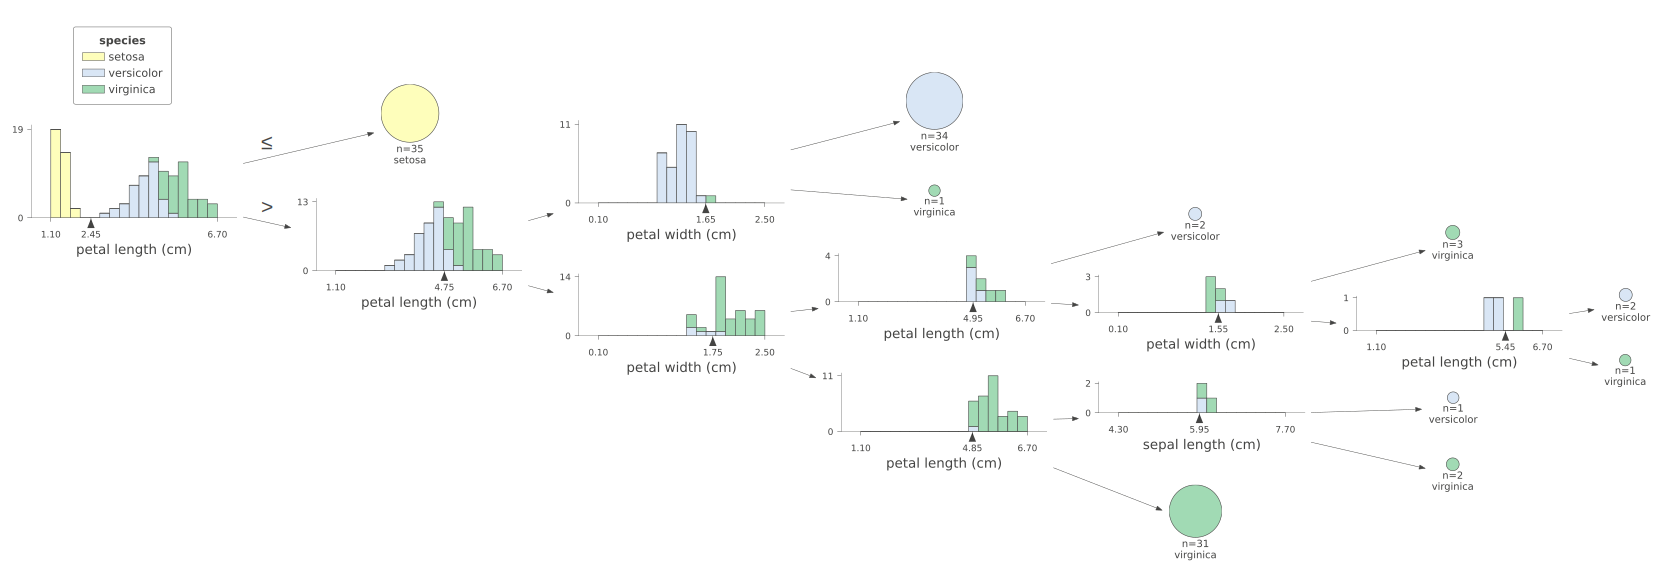

In [1125]:
viz.view(scale=1.5, orientation='LR')

### Show Prediction Path

In [1126]:
X_query = iris.data[np.random.randint(0, len(iris.data)), :]
X_query

array([5.6, 3. , 4.5, 1.5])

In [1127]:
viz = model(clf,
            X_train,
            y_train,
            feature_names=iris.feature_names,
            target_name="species",
            class_names=['setosa', 'versicolor', 'virginica'])

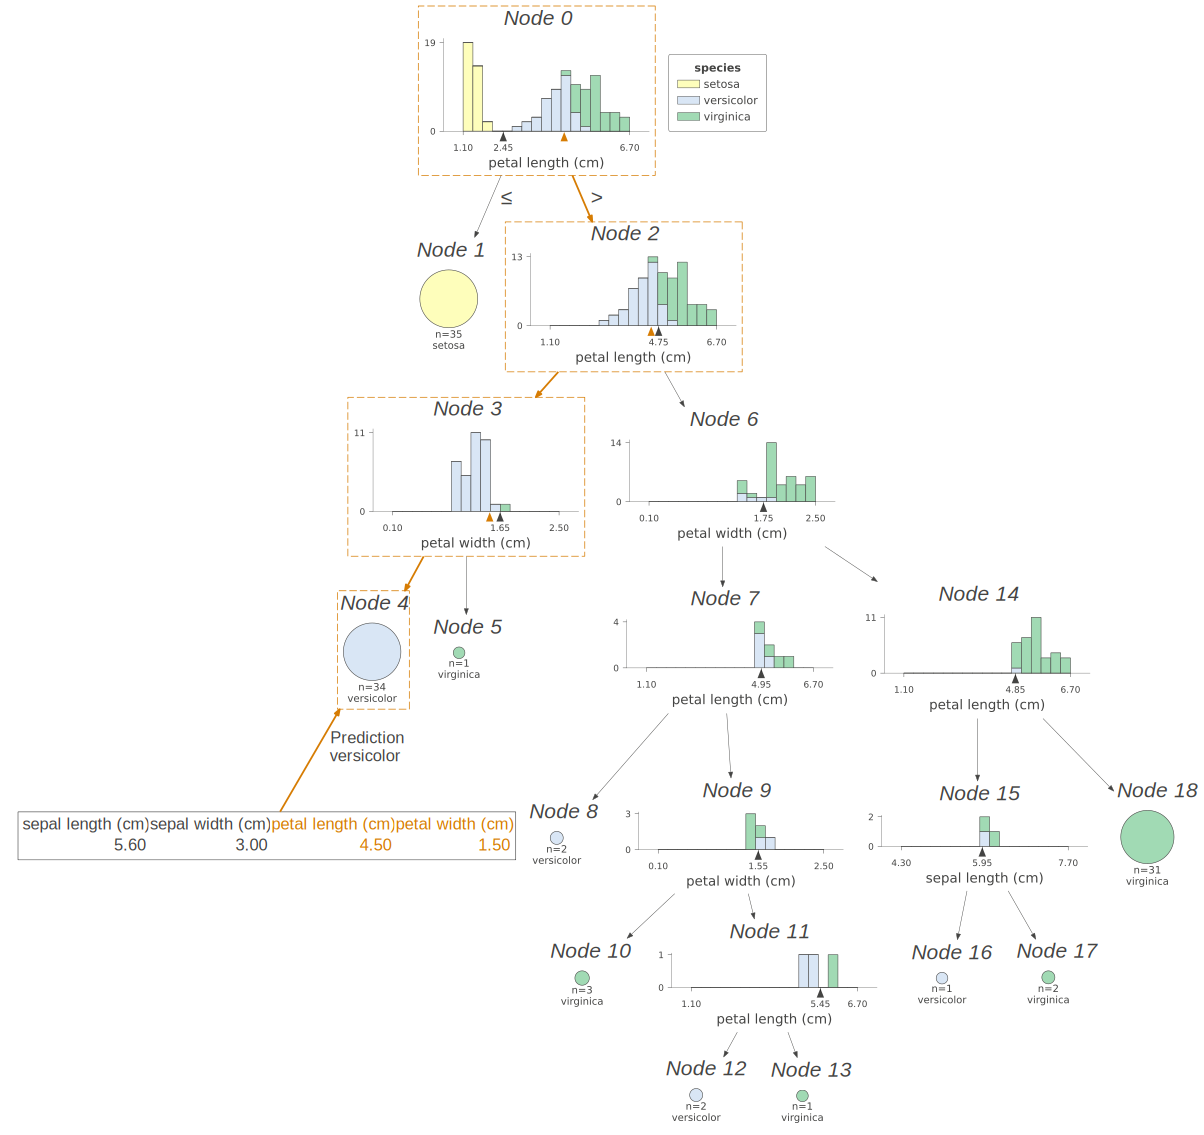

In [1128]:
viz.view(x=X_query, scale=1.5, show_node_labels=1)

### Show node number

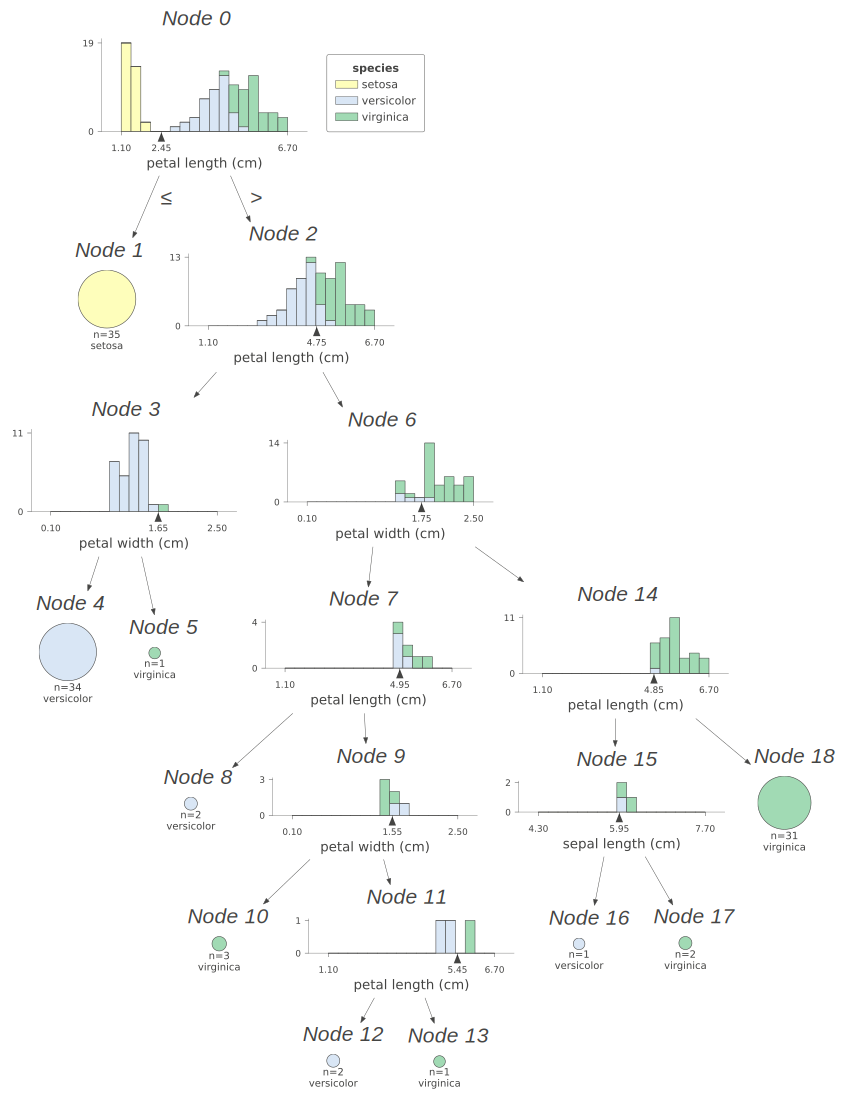

In [1129]:
viz.view(scale=1.5, show_node_labels=True)

### Without Any graphs

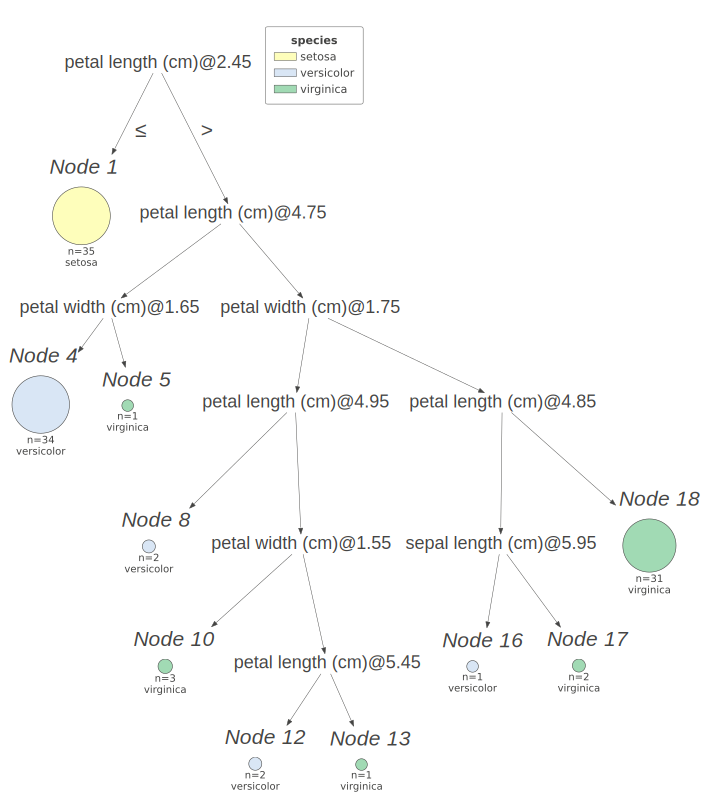

In [1130]:
viz.view(scale=1.5, show_node_labels=True, fancy=False)

### Show just prediction path, nothing else

In [1131]:
viz.explain_prediction_path(X_query)

'2.45 <= petal length (cm)  < 4.75\npetal width (cm) < 1.65\n'

### Feature Importance

In [1132]:
# viz.feature_importance()

### 2. Regression

In [1133]:
from dtreeviz import model
from sklearn.tree import DecisionTreeRegressor

In [1134]:
from sklearn.datasets import fetch_openml

boston = fetch_openml(name='boston', version=1, as_frame=True)
X_train = boston.data
y_train = boston.target

In [1135]:
reg = DecisionTreeRegressor(max_depth=3)

In [1136]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [1137]:
viz = model(reg,
            X_train,
            y_train,
            target_name='price',
            feature_names=boston.feature_names)

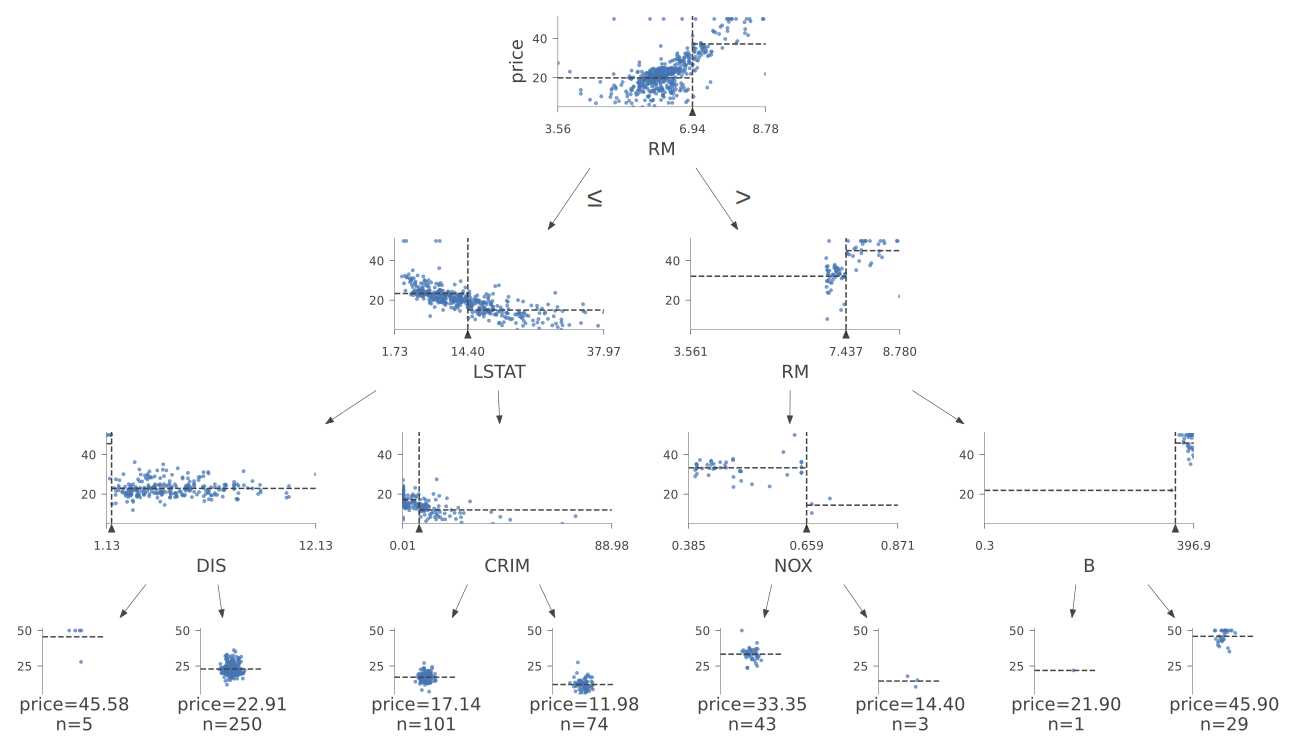

In [1138]:
viz.view(scale=2)